In [1]:
#Unit 3 problem set
#Jeremy Koertzen
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [40]:
#Charge class:

class Charge:
    def __init__(self,x,y,q):
        self.x = x
        self.y = y
        self.q = q
        return
    def potential(self,xgrid,ygrid):
        distance = ((self.x - xgrid)**2 + (self.y - ygrid)**2 )**0.5
        return (self.q/distance)
    def efield(self,xgrid,ygrid):
        deltax = -self.x + xgrid
        deltay = -self.y + ygrid
        distance = ((self.x - xgrid)**2 + (self.y - ygrid)**2 )**0.5
        Ex = (self.q * deltax)/(distance**3)
        Ey = (self.q * deltay)/(distance**3)
        return (Ex,Ey)

#Summing of fields function:

def net_field(chargelist,x,y):
    Ex_net = 0
    Ey_net = 0
    for charge in chargelist:
        Ex,Ey = charge.efield(x,y)
        Ex_net += Ex
        Ey_net += Ey
    return Ex_net,Ey_net

def total_potential(chargelist,xgrid):
    potentialslice = 0
    for charge in chargelist:
        v = charge.potential(xgrid,0.)
        potentialslice += v
    return potentialslice


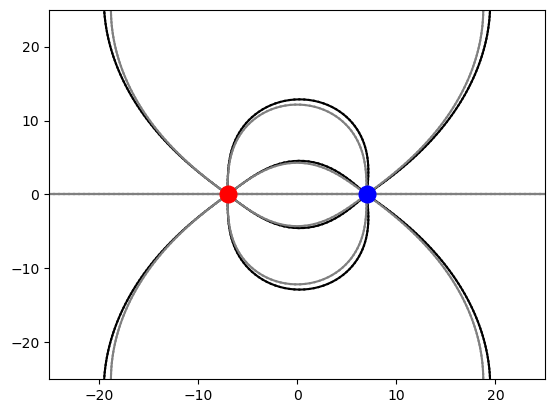

In [3]:
#Problem 1 part a:

#Euler Method:

chargelist = [Charge(-7,0,3),Charge(7,0,-3)]
methods = ['Euler','RK']

step = 0.5
y = np.array([0,0+step,0+step,0+step,0,0-step,0-step,0-step])
x = np.array([-7+step,-7+step,-7,-7-step,-7-step,-7-step,-7,-7+step])
step = 0.5

method = methods[0]
len = np.size(x)
dx = 0
dy = 0
for i in range(len):
    #print(y[i])
    r = 1
    while(r >= step):       #Make sure range value is correct.
#for i in range(12):
        if((x[i] >= 25) or (x[i] <= -25) or (y[i] >= 25) or (y[i] <= -25)):
            x[i] = -x[i]
        Ex = net_field(chargelist,x[i],y[i])[0]
        Ey = net_field(chargelist,x[i],y[i])[1]
        E = (Ex**2 + Ey**2)**0.5
        x_old = x[i]
        y_old = y[i]
        dx = (Ex / E)*step
        dy = (Ey / E)*step
        if(method == methods[0]):
            x[i] += (Ex / E)*step
            y[i] += (Ey / E)*step
            x_plot = [x_old,x[i]]
            y_plot = [y_old,y[i]]
            plt.xlim(-25,25)
            plt.ylim(-25,25)
            plt.plot(x_plot,y_plot,color='k',markersize=2)
            #plt.plot(x[i],y[i],color='k',marker='.',markersize=2) 
        if(method == methods[1]):
            Ex_rk = net_field(chargelist,x[i]+(dx/2),y[i]+(dy/2))[0]
            Ey_rk = net_field(chargelist,x[i]+(dx/2),y[i]+(dy/2))[1]
            E_rk = (Ex_rk**2 + Ey_rk**2)**0.5
            dx_rk = (Ex_rk / E_rk)*(step)
            dy_rk = (Ey_rk / E_rk)*(step)
            x[i] += dx_rk
            y[i] += dy_rk
            x_plot = [x_old,x[i]]
            y_plot = [y_old,y[i]]
            plt.xlim(-25,25)
            plt.ylim(-25,25)
            plt.plot(x_plot,y_plot,color='grey',markersize=2)
        r = ((0-y[i])**2 + (7-x[i])**2)**0.5

#RK Method:

y = np.array([0,0+step,0+step,0+step,0,0-step,0-step,0-step])
x = np.array([-7+step,-7+step,-7,-7-step,-7-step,-7-step,-7,-7+step])
r=1
method = methods[1]
len = np.size(x)
dx = 0
dy = 0
for i in range(len):
    #print(y[i])
    r = 1
    while(r >= step):       #Make sure range value is correct.
#for i in range(12):
        if((x[i] >= 25) or (x[i] <= -25) or (y[i] >= 25) or (y[i] <= -25)):
            x[i] = -x[i]
        Ex = net_field(chargelist,x[i],y[i])[0]
        Ey = net_field(chargelist,x[i],y[i])[1]
        E = (Ex**2 + Ey**2)**0.5
        x_old = x[i]
        y_old = y[i]
        dx = (Ex / E)*step
        dy = (Ey / E)*step
        if(method == methods[0]):
            x[i] += (Ex / E)*step
            y[i] += (Ey / E)*step
            x_plot = [x_old,x[i]]
            y_plot = [y_old,y[i]]
            plt.xlim(-25,25)
            plt.ylim(-25,25)
            plt.plot(x_plot,y_plot,color='k',markersize=2)
        if(method == methods[1]):
            #print(dx)
            Ex_rk = net_field(chargelist,x[i]+(dx/2),y[i]+(dy/2))[0]
            Ey_rk = net_field(chargelist,x[i]+(dx/2),y[i]+(dy/2))[1]
            E_rk = (Ex_rk**2 + Ey_rk**2)**0.5
            dx_rk = (Ex_rk / E_rk)*(step)
            dy_rk = (Ey_rk / E_rk)*(step)
            x[i] += dx_rk
            y[i] += dy_rk
            x_plot = [x_old,x[i]]
            y_plot = [y_old,y[i]]
            r = ((0-y[i])**2 + (7-x[i])**2)**0.5
            plt.xlim(-25,25)
            plt.ylim(-25,25)
            plt.plot(x_plot,y_plot,color='grey',markersize=2)
            #plt.plot(x[i],y[i],color='grey',marker='.',markersize=2)
        r = ((0-y[i])**2 + (7-x[i])**2)**0.5
        
         

plt.plot(-7,0,'ro',markersize=12)
plt.plot(7,0,'bo',markersize=12)

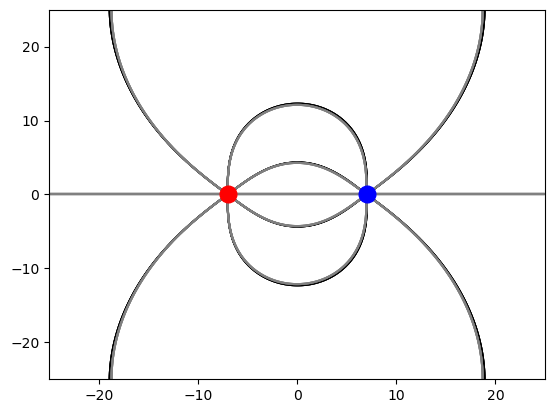

In [4]:
#Problem 1 part b:


#Euler Method:

chargelist = [Charge(-7,0,3),Charge(7,0,-3)]

y = np.array([0,0+step,0+step,0+step,0,0-step,0-step,0-step])
x = np.array([-7+step,-7+step,-7,-7-step,-7-step,-7-step,-7,-7+step])
step = 0.1

method = methods[0]
len = np.size(x)
dx = 0
dy = 0
for i in range(len):
    #print(y[i])
    r = 1
    while(r >= step):       #Make sure range value is correct.
#for i in range(12):
        if((x[i] >= 25) or (x[i] <= -25) or (y[i] >= 25) or (y[i] <= -25)):
            x[i] = -x[i]
        Ex = net_field(chargelist,x[i],y[i])[0]
        Ey = net_field(chargelist,x[i],y[i])[1]
        E = (Ex**2 + Ey**2)**0.5
        x_old = x[i]
        y_old = y[i]
        dx = (Ex / E)*step
        dy = (Ey / E)*step
        if(method == methods[0]):
            x[i] += (Ex / E)*step
            y[i] += (Ey / E)*step
            x_plot = [x_old,x[i]]
            y_plot = [y_old,y[i]]
            plt.xlim(-25,25)
            plt.ylim(-25,25)
            plt.plot(x_plot,y_plot,color='k',markersize=2)
            #plt.plot(x[i],y[i],color='k',marker='.',markersize=2) 
        if(method == methods[1]):
            Ex_rk = net_field(chargelist,x[i]+(dx/2),y[i]+(dy/2))[0]
            Ey_rk = net_field(chargelist,x[i]+(dx/2),y[i]+(dy/2))[1]
            E_rk = (Ex_rk**2 + Ey_rk**2)**0.5
            dx_rk = (Ex_rk / E_rk)*(step)
            dy_rk = (Ey_rk / E_rk)*(step)
            x[i] += dx_rk
            y[i] += dy_rk
            x_plot = [x_old,x[i]]
            y_plot = [y_old,y[i]]
            plt.xlim(-25,25)
            plt.ylim(-25,25)
            plt.plot(x_plot,y_plot,color='grey',markersize=2)
        r = ((0-y[i])**2 + (7-x[i])**2)**0.5

#RK Method:

y = np.array([0,0+step,0+step,0+step,0,0-step,0-step,0-step])
x = np.array([-7+step,-7+step,-7,-7-step,-7-step,-7-step,-7,-7+step])
r=1
method = methods[1]
len = np.size(x)
dx = 0
dy = 0
for i in range(len):
    #print(y[i])
    r = 1
    while(r >= step):       #Make sure range value is correct.
#for i in range(12):
        if((x[i] >= 25) or (x[i] <= -25) or (y[i] >= 25) or (y[i] <= -25)):
            x[i] = -x[i]
        Ex = net_field(chargelist,x[i],y[i])[0]
        Ey = net_field(chargelist,x[i],y[i])[1]
        E = (Ex**2 + Ey**2)**0.5
        x_old = x[i]
        y_old = y[i]
        dx = (Ex / E)*step
        dy = (Ey / E)*step
        if(method == methods[0]):
            x[i] += (Ex / E)*step
            y[i] += (Ey / E)*step
            x_plot = [x_old,x[i]]
            y_plot = [y_old,y[i]]
            plt.xlim(-25,25)
            plt.ylim(-25,25)
            plt.plot(x_plot,y_plot,color='k',markersize=2)
        if(method == methods[1]):
            #print(dx)
            Ex_rk = net_field(chargelist,x[i]+(dx/2),y[i]+(dy/2))[0]
            Ey_rk = net_field(chargelist,x[i]+(dx/2),y[i]+(dy/2))[1]
            E_rk = (Ex_rk**2 + Ey_rk**2)**0.5
            dx_rk = (Ex_rk / E_rk)*(step)
            dy_rk = (Ey_rk / E_rk)*(step)
            x[i] += dx_rk
            y[i] += dy_rk
            x_plot = [x_old,x[i]]
            y_plot = [y_old,y[i]]
            r = ((0-y[i])**2 + (7-x[i])**2)**0.5
            plt.xlim(-25,25)
            plt.ylim(-25,25)
            plt.plot(x_plot,y_plot,color='grey',markersize=2)
            #plt.plot(x[i],y[i],color='grey',marker='.',markersize=2)
        r = ((0-y[i])**2 + (7-x[i])**2)**0.5
        
         

plt.plot(-7,0,'ro',markersize=12)
plt.plot(7,0,'bo',markersize=12)

In [81]:
#Problem 1 part c:

#When the step size was larger, the field lines produced
#by the two different methods were farther apart than when
#the step size was decreased. The RK method depends on a 
#smaller order of magnitude error, so it should be more 
#accurate for larger step sizes than the Euler method.


In [76]:
#Functions:

def fieldlines(chargelist,x,y,x0,y0,xf,yf):
    step = 0.1
    r=1
    method = methods[1]
    len = np.size(x)
    dx = 0
    dy = 0
    for i in range(len):
        r = 1
        counter = 0
        while(r >= step):       #Make sure range value is correct.
        #for i in range(12):
            counter += 1
            if((x[i] >= 25) or (x[i] <= -25) or (y[i] >= 25) or (y[i] <= -25)):
                x[i] = -x[i]
            Ex,Ey = net_field(chargelist,x[i],y[i])
            E = (Ex**2 + Ey**2)**0.5
            x_old = x[i]
            y_old = y[i]
            dx = (Ex / E)*step
            dy = (Ey / E)*step
            if(method == methods[0]):
                x[i] += (Ex / E)*step
                y[i] += (Ey / E)*step
                x_plot = [x_old,x[i]]
                y_plot = [y_old,y[i]]
                plt.xlim(-25,25)
                plt.ylim(-25,25)
                plt.plot(x_plot,y_plot,color='k',markersize=2)
            if(method == methods[1]):
                Ex_rk,Ey_rk = net_field(chargelist,x[i]+(dx/2),y[i]+(dy/2))
                E_rk = (Ex_rk**2 + Ey_rk**2)**0.5
                dx_rk = (Ex_rk / E_rk)*(step)
                dy_rk = (Ey_rk / E_rk)*(step)
                x[i] += dx_rk
                y[i] += dy_rk
                x_plot = [x_old,x[i]]
                y_plot = [y_old,y[i]]
                plt.xlim(-25,25)
                plt.ylim(-25,25)
                plt.plot(x_plot,y_plot,color='grey',markersize=2)
            r = ((yf-y[i])**2 + (xf-x[i])**2)**0.5
            if(counter >=700):
                break
    for charge in chargelist:
        if (charge.q<0):
            plt.plot(charge.x,charge.y,'bo',markersize=12)
        if (charge.q>0):
            plt.plot(charge.x,charge.y,'ro',markersize=12)
        
def equipotentials(chargelist,x,y):
    step = 0.1
    method = methods[1]
    len = np.size(x)
    dx = 0
    dy = 0
    for i in range(len):
        counter = 0
        while(r >= step):       #Make sure range value is correct.
        #for j in range(80):
            counter += 1
            Ex,Ey = net_field(chargelist,x[i],y[i])
            Ey,Ex = -Ex,Ey
            E = (Ex**2 + Ey**2)**0.5
            x_old = x[i]
            y_old = y[i]
            dx = (Ex / E)*step
            dy = (Ey / E)*step
            if(method == methods[0]):
                x[i] += (Ex / E)*step
                y[i] += (Ey / E)*step
                x_plot = [x_old,x[i]]
                y_plot = [y_old,y[i]]
                plt.xlim(-25,25)
                plt.ylim(-25,25)
                plt.plot(x_plot,y_plot,color='k',markersize=2)
            if(method == methods[1]):
                Ex_rk,Ey_rk = net_field(chargelist,x[i]+(dx/2),y[i]+(dy/2))
                E_rk = (Ex_rk**2 + Ey_rk**2)**0.5
                dx_rk = (Ex_rk / E_rk)*(step)
                dy_rk = (Ey_rk / E_rk)*(step)
                y[i] += -dx_rk
                x[i] += dy_rk
                x_plot = [x_old,x[i]]
                y_plot = [y_old,y[i]]
                plt.xlim(-25,25)
                plt.ylim(-25,25)
                plt.plot(x_plot,y_plot,color='y',markersize=4)
            if(counter >= 500):
                break
    
    

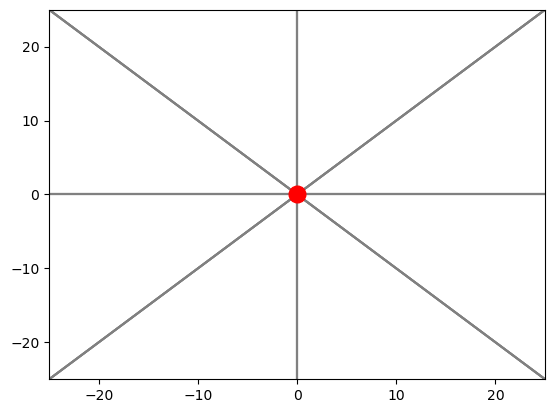

In [80]:
#Question 2 part a:

chargelist = [Charge(0,0,1)]
step = 0.1
x0 = 0
y0 = 0
y = np.array([x0,x0+step,x0+step,x0+step,x0,x0-step,x0-step,x0-step])
x = np.array([x0+step,x0+step,x0,x0-step,x0-step,x0-step,x0,x0+step])
field_lines = fieldlines(chargelist,x,y,x0,y0,100,100)


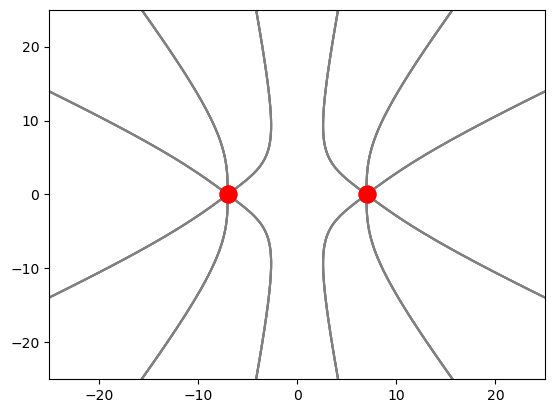

In [35]:
#Question 2 part b:

chargelist = [Charge(-7,0,3),Charge(7,0,3)]
#y = np.array([0.1,0.1+step,0.1+step,0.1+step,-0.1-step,-0.1-step,-0.1-step])
#x = np.array([-7+step,-7+step,-7,-7-step,-7-step,-7,-7+step])
y1 = np.array([0.1,0.1,0.1,-0.1,-0.1,-0.1])
y2 = np.array([0.1,0.1,0.1,-0.1,-0.1,-0.1])
x1 = np.array([-6.9,-7.0,-7.1,-7.1,-7.0,-6.9])
x2 = np.array([6.9,7.0,7.1,7.1,7.0,6.9])
#x0 = np.array([-4.])
#y0 = np.array([3.])

left_charge = fieldlines(chargelist,x1,y1,7.,0.,-7.,0.)
right_charge = fieldlines(chargelist,x2,y2,7.,0.,-7.,0.)
#print(right_charge)
#left_charge = fieldlines(chargelist,x1,y1,-7.,0.,7.,0.)
#print(left_charge)



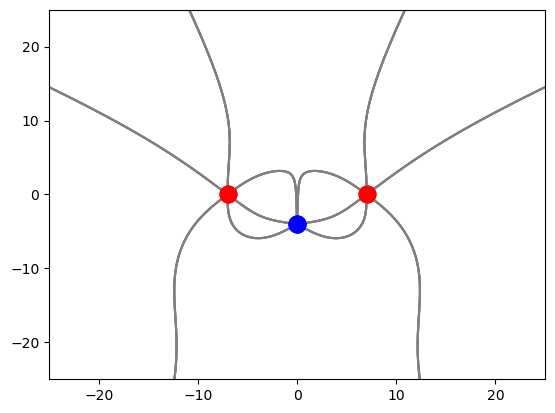

In [36]:
#Question 2 part c:

chargelist = [Charge(-7,0,3),Charge(7,0,3),Charge(0,-4,-3)]
y1 = np.array([0.1,0.1,0.1,-0.1,-0.1,-0.1])
y2 = np.array([0.1,0.1,0.1,-0.1,-0.1,-0.1])
x1 = np.array([-6.9,-7.0,-7.1,-7.1,-7.0,-6.9])
x2 = np.array([6.9,7.0,7.1,7.1,7.0,6.9])

left_charge = fieldlines(chargelist,x1,y1,7.,0.,-7.,0.)
right_charge = fieldlines(chargelist,x2,y2,7.,0.,-7.,0.)
plt.plot(0,-4,'bo',markersize=12)


None
None


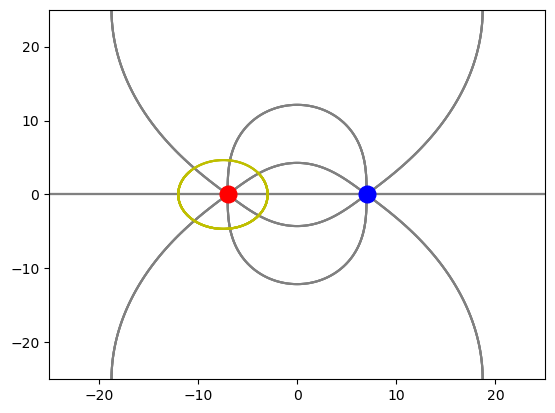

In [37]:
#Question 3:

chargelist = [Charge(-7,0,3),Charge(7,0,-3)]
y = np.array([0,0+step,0+step,0+step,0,0-step,0-step,0-step])
x = np.array([-7+step,-7+step,-7,-7-step,-7-step,-7-step,-7,-7+step])

x0 = np.array([-4.])
y0 = np.array([3.])

test = fieldlines(chargelist,x,y,-7,0,7,0)
test2 = equipotentials(chargelist,x0,y0)
print(test)
print(test2)

[-4.53030303 -3.97272727 -3.13636364 -1.88181818  2.02121212  3.27575758
  4.11212121  4.66969697]


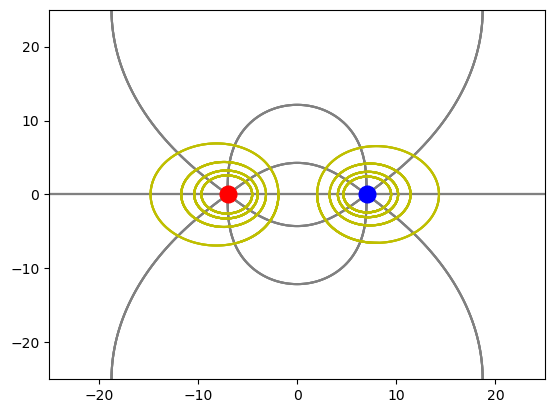

In [79]:
#Question 4:

#Finding the starting x values:

chargelist = [Charge(-7,0,3),Charge(7,0,-3)]
levels = [1.,0.75,0.5,0.25,-0.25,-0.5,-0.75,-1.]
xgrid = np.linspace(-6.9,6.9,100)
potentialslice = total_potential(chargelist,xgrid)
starting_x = np.zeros(np.size(levels))
for j in range(np.size(levels)):
    isabove = potentialslice<levels[j]
    i = np.argmax(isabove)
    starting_x[j] += xgrid[i]
print(starting_x)

#Plotting the field lines and equipotentials:

y = np.array([0,0+step,0+step,0+step,0,0-step,0-step,0-step])
x = np.array([-7+step,-7+step,-7,-7-step,-7-step,-7-step,-7,-7+step])

x0 = starting_x
y0 = np.zeros(np.size(starting_x))

field_lines = fieldlines(chargelist,x,y,-7,0,7,0)
equipotential_lines = equipotentials(chargelist,x0,y0)
